# Gradient Boosting (Regression)

In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [26]:
data = pd.read_csv('after_lasso.csv')
data = data.drop(['Id', 'TotRmsAbvGrd'], axis = 1)
data.head()

,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SaleType,SaleCondition,LogSalePrice
0,2,8450,3,4,5,0,0,7,5,104,...,2,0,61,0,0,0,0,8,0,12.247694
1,2,9600,3,2,24,1,0,6,6,77,...,2,298,0,0,0,0,0,8,0,12.109011
2,2,11250,0,4,5,0,0,7,5,102,...,2,0,42,0,0,0,0,8,0,12.317167
3,2,9550,0,0,6,0,0,7,5,19,...,3,0,35,272,0,0,0,8,1,11.849398
4,2,14260,0,2,15,0,0,8,5,101,...,3,192,84,0,0,0,0,8,0,12.429216


In [27]:
X= data.drop(['LogSalePrice'], axis = 1)
Y = np.ravel(data.LogSalePrice)

In [64]:
test = pd.read_csv('after_lasso_test.csv')
test = test.drop(['Id', 'TotRmsAbvGrd'], axis = 1)
test.head()

,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,...,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SaleType,SaleCondition
0,1,11622,3,4,12,1,0,5,6,56,...,0,1.0,140,0,0,0,120,0,9,0
1,2,14267,0,0,12,0,0,6,6,53,...,0,1.0,393,36,0,0,0,12500,9,0
2,2,13830,0,4,8,0,0,5,5,92,...,0,2.0,212,34,0,0,0,0,9,0
3,2,9978,0,4,8,0,0,6,6,93,...,0,2.0,360,36,0,0,0,0,9,0
4,2,5005,0,4,22,0,1,8,5,87,...,0,2.0,0,82,0,0,144,0,9,0


In [58]:
test.isnull().sum().sum()

0

In [29]:
X.shape

(1460, 39)

In [30]:
gbm = GradientBoostingRegressor() # creating an instance of the Class

In [31]:
gbm.fit(X,Y) # baseline model without any alteration of parameters

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
gbm.score(X,Y) # before train_test_split (baseline model)

0.9505385799456486

In [33]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.3, random_state=42) # cross validation: splitting the data into train & test group

In [34]:
# setting parameters to use for Gradient Boosting
gbm.set_params(learning_rate=0.01, n_estimators=1500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)
gbm.fit(X_train,Y_train) # fitting the model

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1604           0.0018            2.43s
         2           0.1614           0.0011            3.81s
         3           0.1670           0.0012            3.79s
         4           0.1608           0.0013            3.71s
         5           0.1723           0.0009            3.45s
         6           0.1541           0.0016            3.43s
         7           0.1491           0.0011            3.35s
         8           0.1610           0.0011            3.27s
         9           0.1685           0.0001            3.17s
        10           0.1578           0.0006            3.23s
        20           0.1536           0.0010            2.44s
        30           0.1420           0.0009            2.35s
        40           0.1216           0.0008            2.13s
        50           0.1180           0.0008            1.96s
        60           0.1076           0.0005            1.83s
       

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=2, max_leaf_nodes=None,
                          min_impurity_decrease=0.01, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [35]:
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))

The train set R^2 is 0.941
The test set R^2 is 0.873


In [36]:
train_error = (1 - gbm.score(X_train, Y_train))
test_error = (1 - gbm.score(X_test, Y_test))
print("The training error is: %.5f" %train_error)
print("The test      error is: %.5f" %test_error)

The training error is: 0.05922
The test      error is: 0.12680


In [37]:
sorted_importance = sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.12065465137750793),
 ('GrLivArea', 0.10745437031266626),
 ('TotalBsmtSF', 0.07410455324043203),
 ('GarageCars', 0.07354879561290663),
 ('FullBath', 0.06409620188415839),
 ('YearBuilt', 0.057138191020841965),
 ('ExterQual', 0.05085668926720476),
 ('KitchenQual', 0.046258738507559426),
 ('OpenPorchSF', 0.04587836208883941),
 ('Fireplaces', 0.042589489445618155),
 ('LotArea', 0.03948145467694535),
 ('BsmtQual', 0.029200345418246284),
 ('MSZoning', 0.02895447758697018),
 ('GarageType', 0.024091552815582336),
 ('CentralAir', 0.018202217624683895),
 ('OverallCond', 0.016399821461731773),
 ('BsmtExposure', 0.016217821085475634),
 ('HalfBath', 0.015399539450553695),
 ('HeatingQC', 0.01526315281939752),
 ('BedroomAbvGr', 0.013586766584987215),
 ('BsmtFinType1', 0.013386371170858335),
 ('WoodDeckSF', 0.012250424682661921),
 ('Neighborhood', 0.01196755774483605),
 ('LotShape', 0.008832590609684905),
 ('Foundation', 0.008539247883271223),
 ('ExterCond', 0.008525324224377568),
 (

Text(0.5, 1.0, 'Feature Importance Plot of 1500-Tree GBM')

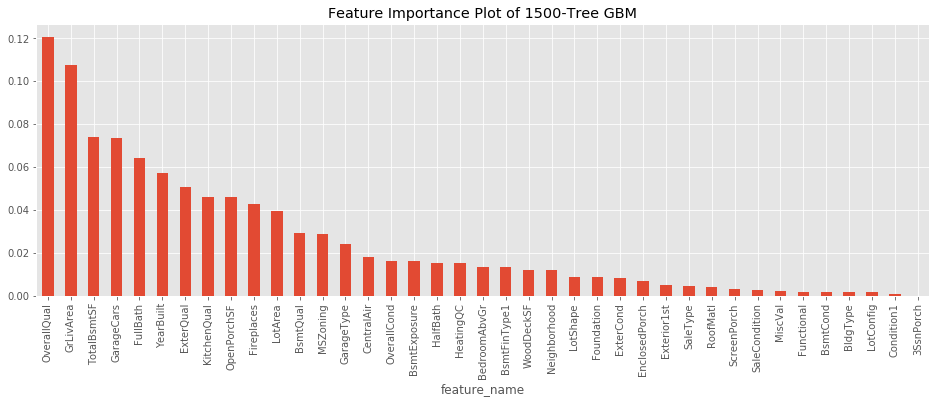

In [38]:
plt.rcParams['figure.figsize'] = (16,5)
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 1500-Tree GBM')

Text(0.5, 1.0, 'Feature Importance Plot of 1500-Tree GBM')

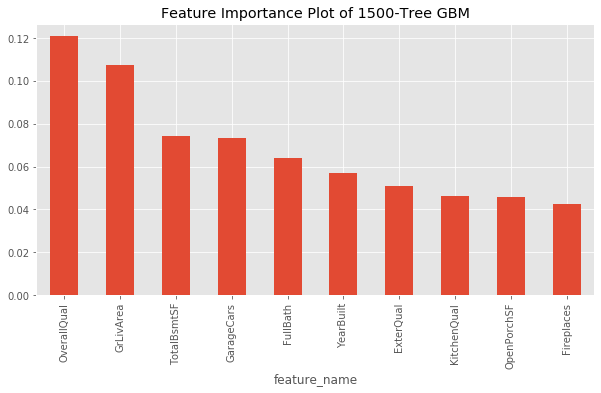

In [39]:
plt.rcParams['figure.figsize'] = (10,5)
## Top 10 features Bar Chart
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a[0:10], 'importance_score':b[0:10]}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 1500-Tree GBM')

# Running Grid Search to find optimal Hyperparameters

In [ ]:
gbm.set_params(learning_rate=0.01, n_estimators=1500, verbose=1, subsample=0.7, warm_start=False, loss='ls', max_depth=2, max_features=2, min_impurity_decrease=0.01)

In [50]:
grid_para_gbm = [{
    "learning_rate": [0.01],
    "verbose": [1],
    "subsample": [0.7],
    "loss": ['ls'],
    "n_estimators": range(500, 2000, 500),
    "max_depth": range(2, 5),
    "max_features": range(2, 5),  #  sqrt(number of samples) 
    "min_impurity_decrease": np.linspace(0.01,0.05, 3), 
    "min_samples_split": range(2,5),
    "random_state": [42] }]

gbm.set_params()
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, cv = 5, scoring = 'r2', n_jobs = -1)
%time grid_search_gbm.fit(X, Y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1594           0.0019            4.33s
         2           0.1562           0.0020            3.69s
         3           0.1553           0.0016            3.33s
         4           0.1563           0.0020            3.07s
         5           0.1529           0.0017            3.23s
         6           0.1472           0.0019            3.30s
         7           0.1450           0.0019            3.20s
         8           0.1466           0.0018            3.11s
         9           0.1447           0.0017            3.02s
        10           0.1383           0.0018            2.93s
        20           0.1209           0.0015            2.42s
        30           0.1107           0.0013            2.21s
        40           0.0917           0.0013            2.34s
        50           0.0893           0.0010            2.28s
        60           0.0796           0.0008            2.20s
       

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=2,
                                                 max_features=2,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.01,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1500,
                                                 n_iter_n...
             param_grid=[{'l

In [51]:
## best parameters
grid_search_gbm.best_params_

{'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': 4,
 'min_impurity_decrease': 0.01,
 'min_samples_split': 2,
 'n_estimators': 1500,
 'random_state': 42,
 'subsample': 0.7,
 'verbose': 1}

In [52]:
## best score
grid_search_gbm.best_score_

0.910572751286766

In [53]:
## The overall accuracy on the training set:
grid_search_gbm.score(X_train, Y_train)

0.9647377323432538

In [54]:
## The overall accuracy on the test set:
grid_search_gbm.score(X_test, Y_test)

0.9640638304218467

In [65]:
# setting parameters to use for Gradient Boosting
gbm.set_params(learning_rate=0.01, n_estimators=1500, verbose=1, subsample=0.7, warm_start=False, loss='ls', min_samples_split = 2, max_depth=4, max_features=4, min_impurity_decrease=0.01)
gbm.fit(X,Y) # fitting the model
gbm.predict(test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1557           0.0021            3.26s
         2           0.1544           0.0022            3.83s
         3           0.1473           0.0022            4.30s
         4           0.1528           0.0020            4.95s
         5           0.1525           0.0018            7.49s
         6           0.1467           0.0022            8.02s
         7           0.1472           0.0019            8.23s
         8           0.1433           0.0017            7.78s
         9           0.1434           0.0018            7.30s
        10           0.1336           0.0018            7.53s
        20           0.1246           0.0013            4.98s
        30           0.1118           0.0013            4.16s
        40           0.0987           0.0012            3.62s
        50           0.0843           0.0010            3.24s
        60           0.0725           0.0009            3.01s
       

array([11.66658091, 12.03435199, 12.07514769, ..., 11.95955476,
       11.74147272, 12.24434045])

In [62]:
test.isin(['None']).any() 

MSZoning         False
LotArea          False
LotShape         False
LotConfig        False
Neighborhood     False
Condition1       False
BldgType         False
OverallQual      False
OverallCond      False
YearBuilt        False
RoofMatl         False
Exterior1st      False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
TotalBsmtSF       True
HeatingQC        False
CentralAir       False
GrLivArea        False
FullBath          True
HalfBath          True
BedroomAbvGr     False
KitchenQual      False
Functional       False
Fireplaces       False
GarageType       False
GarageCars        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
MiscVal          False
SaleType         False
SaleCondition    False
dtype: bool

In [17]:
Iowa_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=X_train.columns)
Iowa_importance

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,SaleType,SaleCondition,BsmtHasBath
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51,0.001210,0.031646,0.028857,0.012710,0.000000,0.011007,0.003391,0.002750,0.007955,0.002826,...,0.013426,0.000636,0.000658,0.001077,0.005870,0.000000,0.000000,0.001235,0.015407,0.006417
101,0.003879,0.030154,0.030636,0.011959,0.000139,0.011029,0.003257,0.003682,0.007828,0.006990,...,0.013338,0.000598,0.000652,0.001505,0.005983,0.000010,0.000896,0.001308,0.015104,0.006079
151,0.004460,0.030237,0.032767,0.011771,0.000152,0.012000,0.003345,0.003778,0.008037,0.007438,...,0.013658,0.000677,0.000702,0.001732,0.005952,0.000103,0.000971,0.001321,0.015113,0.006464
201,0.004501,0.030266,0.032658,0.011783,0.000392,0.012293,0.003327,0.003789,0.008122,0.007863,...,0.013718,0.000814,0.000697,0.002430,0.005905,0.000184,0.001087,0.001311,0.014994,0.006506
251,0.004640,0.030360,0.032975,0.011815,0.000406,0.012351,0.003354,0.003777,0.008084,0.008213,...,0.013679,0.000945,0.000721,0.002601,0.005875,0.000201,0.001082,0.001442,0.015045,0.006542
301,0.004755,0.030320,0.033064,0.011765,0.000432,0.012352,0.003380,0.003779,0.008087,0.008300,...,0.013741,0.001090,0.000736,0.002828,0.005851,0.000252,0.001280,0.001436,0.015163,0.006533
351,0.004738,0.030400,0.033325,0.011836,0.000437,0.012413,0.003381,0.003777,0.008093,0.008468,...,0.013710,0.001155,0.000747,0.002879,0.005830,0.000264,0.001297,0.001452,0.015156,0.006542
401,0.004735,0.030442,0.033521,0.011876,0.000440,0.012485,0.003381,0.003803,0.008111,0.008672,...,0.013718,0.001170,0.000745,0.002931,0.005814,0.000263,0.001454,0.001448,0.015132,0.006569
451,0.004805,0.030533,0.033520,0.011877,0.000448,0.012512,0.003380,0.003800,0.008099,0.008710,...,0.013894,0.001181,0.000783,0.002936,0.005801,0.000281,0.001537,0.001453,0.015136,0.006583


Text(0, 0.5, 'feature importance')

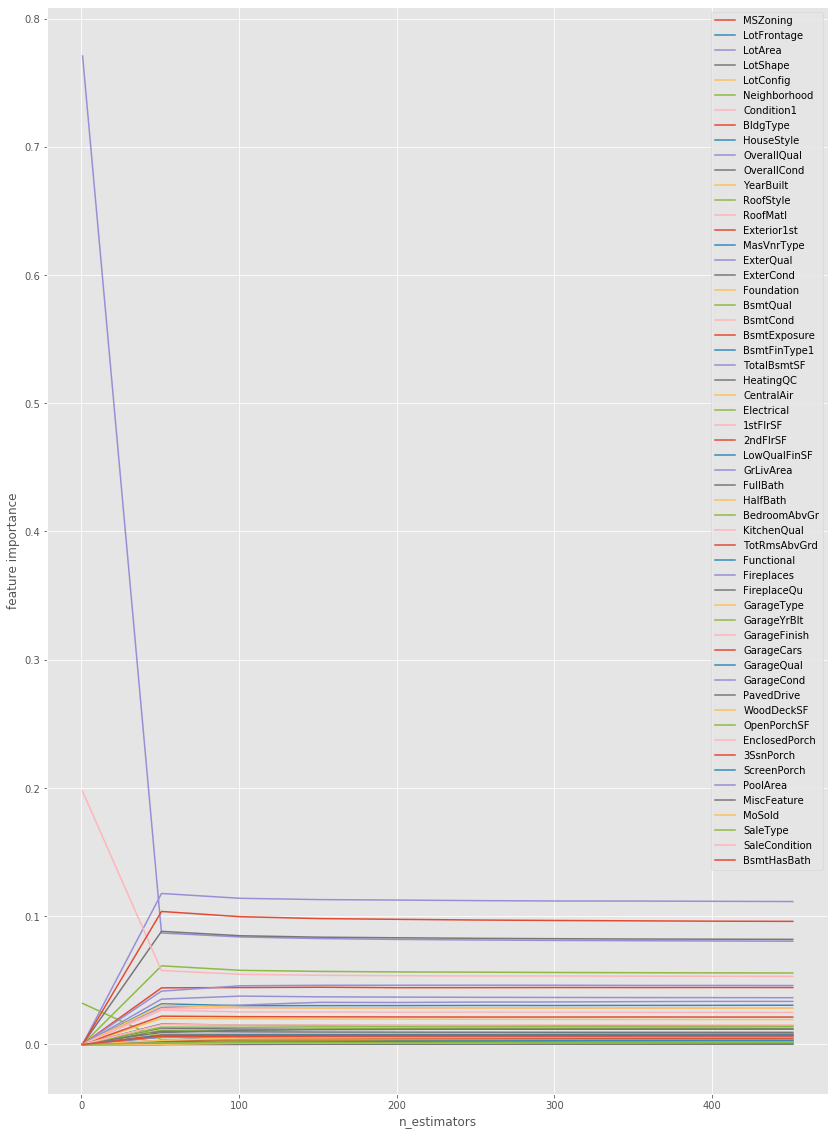

In [18]:
plt.rcParams['figure.figsize'] = (14,20)
for feature in Iowa_importance.columns:
    plt.plot(Iowa_importance.index, Iowa_importance[feature], label=feature)
    
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')